# Student Performace in Secondary Education
This is the main project for Week-5 of this course. The dataset is from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Student+Performance) (originating from the University of Minho, GuimarÃ£es, Portugal). You can download the dataset from the link above.


# Objectives:
1. Data set explanation.
2. Data Preparation for Classification and Regression.
3. Defining Classification and Regression models.
4. Models Evaluation.
5. Feature Iportance.
6. Error Calculation.
7. Model Boosting/Tuning(Avoids Overfitiing).

## Additional Requirements:
1. pip install xgboost

# Data Set Information:

This data approaches student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In <mark> [Cortez and Silva, 2008] </mark>, the two datasets were modeled under binary/five-level classification and regression tasks. <mark>"In this notebook, I use one subject containg dataset i.e; Math"</mark>. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details)

In [1]:
# Importing Libraries

import numpy as np  
import pandas as pd
from collections import defaultdict
import sklearn
import csv
import time
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor  
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

The purpose of this dataset is to predict G3 (final grade) using G1, G2(period grades) and other attributes.

Below is the dataset description from the UCI Machine Learning Repository. 

# Attributes for student-mat.csv (Math course) dataset:

1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)


2 sex - student's sex (binary: "F" - female or "M" - male)


3 age - student's age (numeric: from 15 to 22)


4 address - student's home address type (binary: "U" - urban or "R" - rural)


5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)


6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)


7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)


8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)


9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")


10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")


11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")


12 guardian - student's guardian (nominal: "mother", "father" or "other")


13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)


14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)


15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)


16 schoolsup - extra educational support (binary: yes or no)


17 famsup - family educational support (binary: yes or no)


18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)


19 activities - extra-curricular activities (binary: yes or no)


20 nursery - attended nursery school (binary: yes or no)


21 higher - wants to take higher education (binary: yes or no)


22 internet - Internet access at home (binary: yes or no)


23 romantic - with a romantic relationship (binary: yes or no)


24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)


25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)


26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)


27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)


28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)


29 health - current health status (numeric: from 1 - very bad to 5 - very good)


30 absences - number of school absences (numeric: from 0 to 93)

# These grades are related with the course subject, Math:

31 G1 - first period grade (numeric: from 0 to 20)


31 G2 - second period grade (numeric: from 0 to 20)


32 G3 - final grade (numeric: from 0 to 20, output target)

Run the cells below to examine the dataset.

# Data Preparation

In [2]:
# Load student dataset

df = pd.read_csv('student/student-mat.csv', sep = ";")

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df_columns = list(df.columns)
df_columns

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


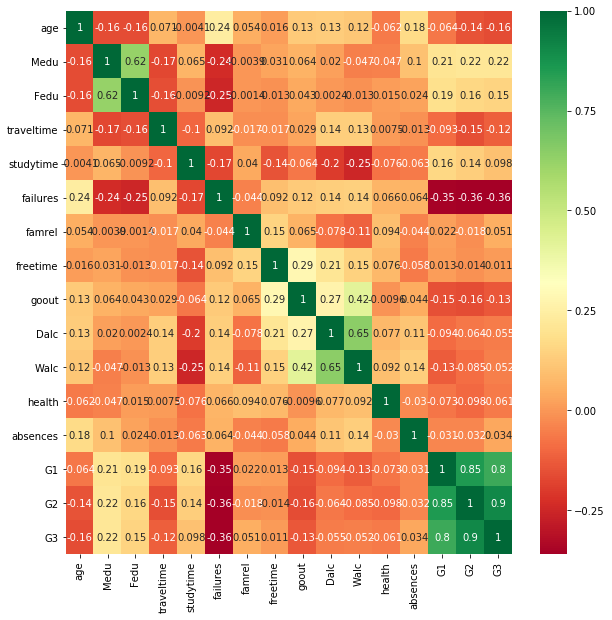

In [6]:
#get correlations of numerical features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [7]:
df = df.dropna()
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [9]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Data Preparation for Classification

## Feature Selection 
Feature Selection for binary classification – pass if G3≥10, else fail.

In [10]:
df['bin_G3'] = 'na'
df.loc[(df.G3 >= 10), 'bin_G3'] = 'pass'
df.loc[(df.G3 < 10), 'bin_G3'] = 'fail'
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,bin_G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,pass
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,pass


Text(0.5, 1.0, 'Binary classification of student final grades')

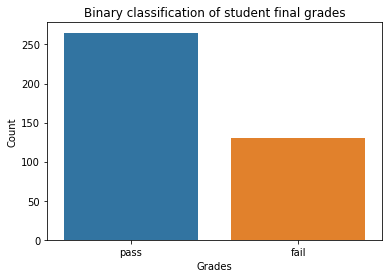

In [11]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'bin_G3', data=df, order=['pass','fail'])
ax = ax.set(ylabel="Count", xlabel = "Grades")
figure.grid(False)
plt.title('Binary classification of student final grades')

As we can see student pass rate is higher but no.of failing students is also substantially high reaching nearly 150.

In [12]:
# Encoding new feature as labels for this classification .
le = preprocessing.LabelEncoder()
df.bin_G3 = le.fit_transform(df.bin_G3)

In [13]:
X = df.drop(labels = ['bin_G3','G3'],axis=1)
y = df.bin_G3

In [14]:
# Train test splitting in 70-30 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [15]:
# get dummy varibles 
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [16]:
X_train.shape

(276, 58)

## Feature Importance
In this project, I will try Feature importance using two models: Extra tree and XGboost classifier. 
Extra tree is an inbuilt class that comes with Tree Based Classifiers. Both have been used here to extract top features. 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


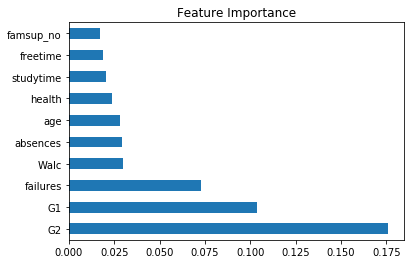

In [17]:
def extclass(x,y):
    model = ExtraTreesClassifier()
    model.fit(x,y)
    
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    feat_importances.nlargest(10).plot(kind='barh')
    plt.title('Feature Importance')
    plt.show()
   
    return model

etcmodel = extclass(X_train,y_train)

From the graph above we can see that G1 and G2 grades are the most significant featueres and other than academics(grades, absences, study time) domestic features such as parents education and student roaming features affect his final grade 'G3'.

XGBoost Train data Score : 1.0 , Validation data Score : 0.8991596638655462


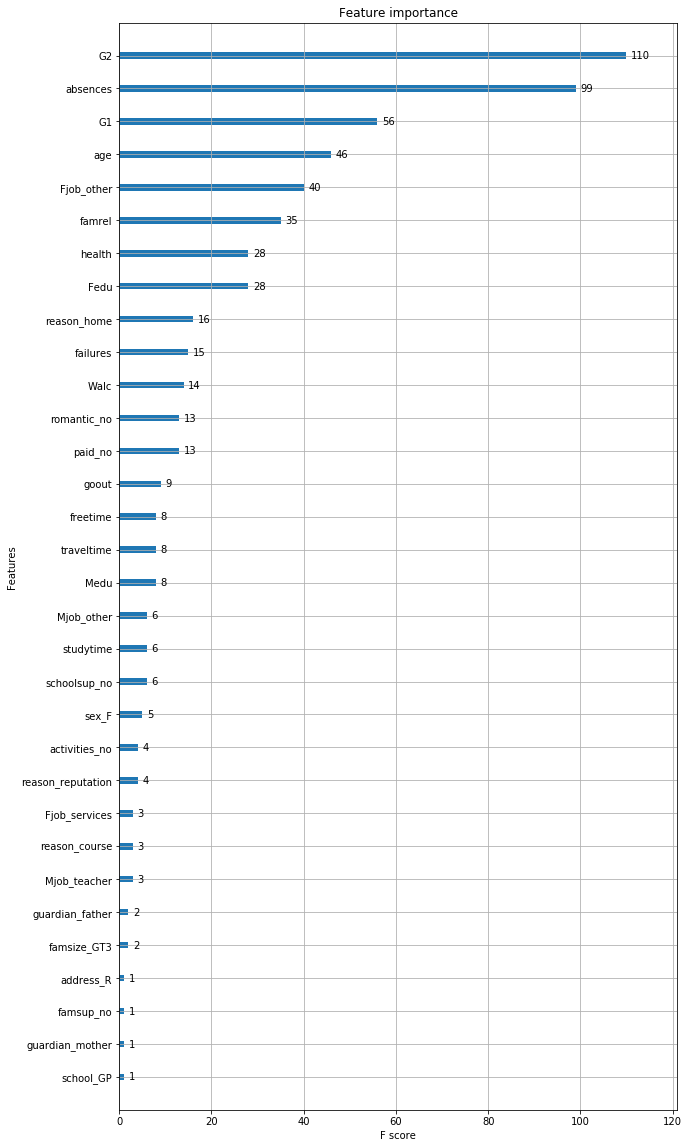

In [18]:
def xgbclass(x_train,y_train,x_val,y_val):
    model = XGBClassifier()
    model = XGBClassifier(learning_rate=0.1,n_estimators=100)
    mf = model.fit(x_train,y_train)
#     y_pred=model.predict(x_val)
#     y_predict = mf.predict_proba(x_val)
    print("XGBoost Train data Score" , ":" , mf.score(x_train, y_train) 
          , "," ,"Validation data Score" ,":" , mf.score(x_val, y_val))
    
    
    # plot feature importance
    fig, ax = plt.subplots(figsize=(10, 20))
    plot_importance(mf, ax=ax)

    plt.show()
    return model

xgmodel = xgbclass(X_train,y_train,X_test,y_test)

From this graph we can see the impact features on the validation/testing set. Here G2,G1 are the most affecting features, then some of the domestic features such as Father education,health,relation affect his final grade 'G3'. 

## Model Evaluation (Classification)


In [19]:
def modelscores(model,Model):
    classes = ['pass','fail']
    y_pred = model.predict(X_test)
    
#     Confusion Matrix
    cm = confusion_matrix(y_test,y_pred)
    accuracy = round(100*np.trace(cm)/np.sum(cm),1)
    
    
    #Plot/Display the results
    cm_plot(cm,Model)
    print('Accuracy of the Model' ,Model, str(accuracy)+'%')
    
    print('\n',classification_report(y_test,y_pred,target_names=classes))
    
    print("\nModel Training Score" , ":" , model.score(X_train, y_train) , "," , 
      "Cross Validation Score" ,":" , model.score(X_test, y_test))
#     print(y_pred)
    df['finalG3'] = pd.DataFrame(y_pred)
    df_out = pd.merge(df,df[['finalG3']],how = 'left',left_index = True, right_index = True)

In [20]:
#Function to plot Confusion Matrix
def cm_plot(cm,Model):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Comparison of Prediction Result for '+ Model)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

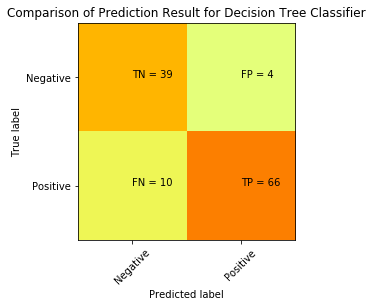

Accuracy of the Model Decision Tree Classifier 88.2%

               precision    recall  f1-score   support

        pass       0.80      0.91      0.85        43
        fail       0.94      0.87      0.90        76

    accuracy                           0.88       119
   macro avg       0.87      0.89      0.88       119
weighted avg       0.89      0.88      0.88       119


Model Training Score : 0.9347826086956522 , Cross Validation Score : 0.8823529411764706


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,bin_G3,finalG3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,0,0.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,0,0.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,1,1.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,1,1.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,1,0.0


In [21]:
# Classification using Decision tree.
Model = "Decision Tree Classifier"

tree = DecisionTreeClassifier(min_samples_leaf=17)
dtcmodel= tree.fit(X_train, y_train)

y_pred = dtcmodel.predict(X_test)
# for i in range(len(X_test)):
#     print("X=%s, Predicted=%s" % (X_test[i], y_pred[i]))

modelscores(dtcmodel,Model)
df.head()

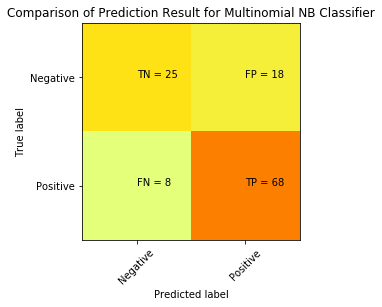

Accuracy of the Model Multinomial NB Classifier 78.2%

               precision    recall  f1-score   support

        pass       0.76      0.58      0.66        43
        fail       0.79      0.89      0.84        76

    accuracy                           0.78       119
   macro avg       0.77      0.74      0.75       119
weighted avg       0.78      0.78      0.77       119


Model Training Score : 0.8695652173913043 , Cross Validation Score : 0.7815126050420168


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,bin_G3,finalG3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,0,0.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,0,0.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,1,1.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,1,1.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,1,0.0


In [22]:
# Classification using Naive Bayes for multinomial models
Model = "Multinomial NB Classifier"

clf = MultinomialNB()
nbmodel= clf.fit(X_train, y_train)

modelscores(nbmodel,Model)
df.head()

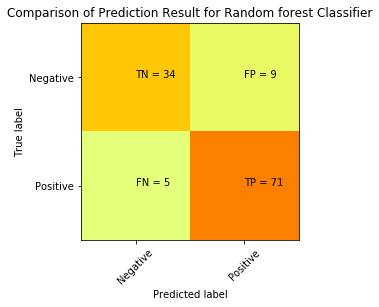

Accuracy of the Model Random forest Classifier 88.2%

               precision    recall  f1-score   support

        pass       0.87      0.79      0.83        43
        fail       0.89      0.93      0.91        76

    accuracy                           0.88       119
   macro avg       0.88      0.86      0.87       119
weighted avg       0.88      0.88      0.88       119


Model Training Score : 0.9891304347826086 , Cross Validation Score : 0.8823529411764706


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,bin_G3,finalG3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,0,0.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,0,0.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,1,1.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,1,1.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,1,1.0


In [23]:
# Classification using Random forest classifier
Model = "Random forest Classifier"

clf = RandomForestClassifier(n_estimators=34, min_samples_leaf=2)
rfmodel= clf.fit(X_train, y_train)

modelscores(rfmodel,Model)
df.head()

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


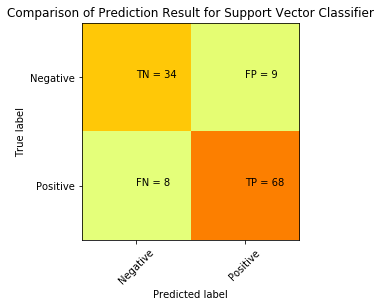

Accuracy of the Model Support Vector Classifier 85.7%

               precision    recall  f1-score   support

        pass       0.81      0.79      0.80        43
        fail       0.88      0.89      0.89        76

    accuracy                           0.86       119
   macro avg       0.85      0.84      0.84       119
weighted avg       0.86      0.86      0.86       119


Model Training Score : 0.9746376811594203 , Cross Validation Score : 0.8571428571428571


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,bin_G3,finalG3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,0,0.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,0,1.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,1,1.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,1,1.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,1,0.0


In [24]:
# Classification using SVC
Model = "Support Vector Classifier"

svc = SVC()
svcmodel= svc.fit(X_train, y_train)

modelscores(svcmodel,Model)
df.head()

# Data Preparation for Regression
Since Data has to be continuous in Regression, I used 'G3' feature as labels to predict its results.

In [25]:
df = df.drop(['bin_G3','finalG3'], axis = 1)
# df = df.drop(['bin_G3'], axis = 1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Text(0.5, 1.0, 'Student final grades')

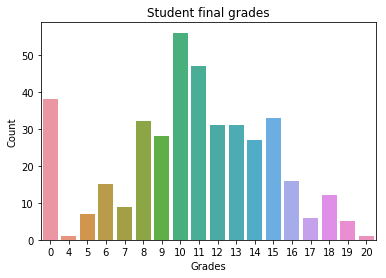

In [26]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'G3', data=df)
ax = ax.set(ylabel="Count", xlabel = "Grades")
figure.grid(False)
plt.title('Student final grades')

## Encoding Categorical variables

In [27]:
objlist = df.select_dtypes(include='object').columns
objlist

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [28]:
le = preprocessing.LabelEncoder()
df['school']=pd.DataFrame(le.fit_transform(df.school))
df['sex']=pd.DataFrame(le.fit_transform(df.sex))
df['address']=pd.DataFrame(le.fit_transform(df.address))
df['famsize']=pd.DataFrame(le.fit_transform(df.famsize))
df['Pstatus']=pd.DataFrame(le.fit_transform(df.Pstatus))
df['Mjob']=pd.DataFrame(le.fit_transform(df.Mjob))
df['Fjob']=pd.DataFrame(le.fit_transform(df.Fjob))
df['reason']=pd.DataFrame(le.fit_transform(df.reason))
df['guardian']=pd.DataFrame(le.fit_transform(df.guardian))
df['schoolsup']=pd.DataFrame(le.fit_transform(df.schoolsup))
df['famsup']=pd.DataFrame(le.fit_transform(df.famsup))
df['paid']=pd.DataFrame(le.fit_transform(df.paid))
df['activities']=pd.DataFrame(le.fit_transform(df.activities))
df['nursery']=pd.DataFrame(le.fit_transform(df.nursery))
df['higher']=pd.DataFrame(le.fit_transform(df.higher))
df['internet']=pd.DataFrame(le.fit_transform(df.internet))
df['romantic']=pd.DataFrame(le.fit_transform(df.romantic))
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [29]:
# Standardization
scaler=StandardScaler()
scaler.fit(df.drop('G3',axis=1))
scaled_features=scaler.transform(df.drop('G3',axis=1))
dataset_scaled=pd.DataFrame(scaled_features,columns=df.columns[:-1])
dataset_scaled.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,-0.36305,-0.948176,1.023046,0.535392,-0.636941,-2.938392,1.143856,1.360371,-1.769793,1.993149,...,-0.708450,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,-1.782467,-1.254791
1,-0.36305,-0.948176,0.238380,0.535392,-0.636941,0.340322,-1.600009,-1.399970,-1.769793,-0.325831,...,-0.708450,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,-1.782467,-1.520979
2,-0.36305,-0.948176,-1.330954,0.535392,1.570004,0.340322,-1.600009,-1.399970,-1.769793,-0.325831,...,-0.708450,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,-1.179147,-0.722415
3,-0.36305,-0.948176,-1.330954,0.535392,-0.636941,0.340322,1.143856,-0.479857,-0.954077,0.833659,...,1.411533,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,1.234133,0.874715
4,-0.36305,-0.948176,-0.546287,0.535392,-0.636941,0.340322,0.229234,0.440257,-0.138362,-0.325831,...,-0.708450,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,-1.480807,-0.190038


In [30]:
# Splitting dataset into train and test sets

X = df.drop(labels = ['G3'],axis=1)    #independent columns
y=df['G3']     #target column i.e final grade

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# X_train = pd.get_dummies(X_train)
# X_test = pd.get_dummies(X_test)
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)
# np.isnan(y_train.values.any())
# X_train.values[:,1]

Training Features Shape: (276, 32)
Training Labels Shape: (276,)
Testing Features Shape: (119, 32)
Testing Labels Shape: (119,)


## Error Calculation and Graph Plotting

In [31]:
def rmscores(model):
    scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=20)
    rmse_scores = np.sqrt(-scores)
    rmean = rmse_scores.mean()

    print("Root mean square error: ",rmean)
    
#     #combined rmse value
# rss=((y_test-y_pred)**2).sum()
# mse=np.mean((y_test-y_pred)**2)
# print("Final rmse value is =",np.sqrt(np.mean((y_test-y_pred)**2)))
# def map_acc(model):
#     # Performance metrics
#     errors = abs(y_pred - y_test)
#     print('Metrics for Random Forest Trained on Expanded Data')
#     print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
#     # Calculate mean absolute percentage error (MAPE)
#     mape = np.mean(100 * (errors / y_test))
    
    # Compare to baseline
#     improvement_baseline = 100 * abs(mape - baseline_mape) / baseline_mape
#     print('Improvement over baseline:', round(improvement_baseline, 2), '%.')
#     print(round(mape,2))
#     # Calculate and display accuracy
#     accuracy = 100 - rmean
#     print('Accuracy:', accuracy, '%.')

## Feature Importance:
1. Selecting the features with high importance.
2. Selecting top 3 features.
3. Selecting these features among previous features via indices(X_train,X_test).

In [66]:
def feat_imp(model):
    # Get numerical feature importances
    importances = list(model.feature_importances_)
    # List of tuples with variable and importance
    feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(df_columns, importances)]
    # Sort the feature importances by most important first
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    # Print out the feature and importances 
#     [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
#     print(feature_importances[0:3])
#     fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    
    # list of x locations for plotting
    x_values = list(range(len(importances)))
#     # Make a bar chart
# #     ax1.plot([1, 2])
#     plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1)
#     # Tick labels for x axis
#     plt.xticks(x_values, df_columns, rotation='vertical')
#     # Axis labels and title
#     plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')
    
    # List of features sorted from most to least important
    sorted_importances = [importance[1] for importance in feature_importances]
    sorted_features = [importance[0] for importance in feature_importances]
    # Cumulative importances
    cumulative_importances = np.cumsum(sorted_importances)
    # Make a line graph
#     ax2.plot([1, 2])
#     plt.plot(x_values, cumulative_importances, 'g-')
#     # Draw line at 95% of importance retained
#     plt.hlines(y = 0.90, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
#     # Format x ticks and labels
#     plt.xticks(x_values, sorted_features, rotation = 'vertical')
#     # Axis labels and title
#     plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances')
    
#     print('Number of features for 90% importance:', np.where(cumulative_importances > 0.90)[0][0] + 1)
    
    # Extract the names of the most important features
    important_feature_names = [feature[0] for feature in feature_importances[0:3]]
    # Find the columns of the most important features
    important_indices = [df_columns.index(feature) for feature in important_feature_names]
#     print(important_indices)
    # Create training and testing sets with only the important features
    important_train_features = X_train.iloc[:, important_indices]
    important_test_features = X_test.iloc[:, important_indices]


#     print(important_train_features.shape)
    # Sanity check on operations
#     print('Important train features shape:', important_train_features.shape)
#     print('Important test features shape:', important_test_features.shape)
    
    return important_train_features,important_test_features

## Model training and Evaluation

In [87]:
# Random Forest Regressor
print("Model : Random forest Regressor")

regr = RandomForestRegressor()
rgrmodel = regr.fit(X_train,y_train)

#predict the test result
y_pred=rgrmodel.predict(X_test)
rmscores(rgrmodel)



df['finalG3'] = pd.DataFrame(y_pred)
df_out = pd.merge(df,df[['finalG3']],how = 'left',left_index = True, right_index = True)
df.head()

Model : Random forest Regressor


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Root mean square error:  1.4891846307314445


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,finalG3
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,6,5,6,6,7.9
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,4,5,5,6,11.9
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,10,7,8,10,7.5
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,9.4
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,4,6,10,10,8.5


In [88]:
important_train_features,important_test_features = feat_imp(rgrmodel)

In [93]:
# Train the expanded model on only the important features
rgrmodel.fit(important_train_features, y_train)
# Make predictions on test data
y_pred = rgrmodel.predict(important_test_features)

scores = cross_val_score(rgrmodel, important_train_features, y_train, scoring="neg_mean_squared_error", cv=20)
rmse_scores = np.sqrt(-scores)
rmean = rmse_scores.mean()
print("RMSE for Feature Engineered RF : ",rmean)

RMSE for Feature Engineered RF :  1.4611114669764524


Model : Linear Regressor
Root mean square error:  1.7844463379416968


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,finalG3
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,6,5,6,6,6.599157
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,4,5,5,6,11.601092
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,10,7,8,10,2.714617
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,8.306609
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,4,6,10,10,8.576246


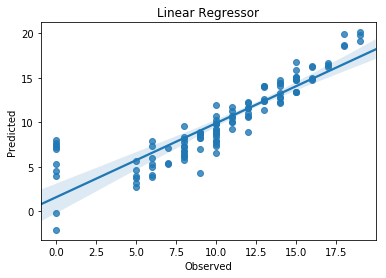

In [109]:
# Linear Regressor
print("Model : Linear Regressor")

lnr = LinearRegression()
lnrmodel = lnr.fit(X_train, y_train)

#predict the test result
y_pred=lnrmodel.predict(X_test)
# print(y_test.shape)
plt.title('Linear Regressor')
sns.regplot(y_test,y_pred)
plt.xlabel('Observed')
plt.ylabel('Predicted')
rmscores(lnrmodel)



df['finalG3'] = pd.DataFrame(y_pred)
df_out = pd.merge(df,df[['finalG3']],how = 'left',left_index = True, right_index = True)
df.head()

In [94]:
# Decision tree Regressor
print("Model : Decision tree Regressor")

dtr = DecisionTreeRegressor(random_state = 0)  
dtrmodel = dtr.fit(X_train,y_train)

#predict the test result
y_pred=dtrmodel.predict(X_test)
# print(y_test.shape)
# plt.title('Decision Tree Regressor')
# graphs(dtrmodel)
rmscores(dtrmodel)

df['finalG3'] = pd.DataFrame(y_pred)
df_out = pd.merge(df,df[['finalG3']],how = 'left',left_index = True, right_index = True)
df.head()

Model : Decision tree Regressor
Root mean square error:  1.9487467976467108


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,finalG3
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,6,5,6,6,8.0
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,4,5,5,6,11.0
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,10,7,8,10,6.0
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,10.0
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,4,6,10,10,7.0


In [95]:
important_train_features,important_test_features = feat_imp(dtrmodel)

In [100]:
# Train the expanded model on only the important features
dtrmodel.fit(important_train_features, y_train)
# Make predictions on test data
y_pred = dtrmodel.predict(important_test_features)

scores = cross_val_score(dtrmodel, important_train_features, y_train, scoring="neg_mean_squared_error", cv=20)
rmse_scores = np.sqrt(-scores)
rmean = rmse_scores.mean()
print("RMSE: ",rmean)

# plt.title('FE Random forest')
# plt.scatter(y_test,y_pred)
# plt.plot([0,(np.max(y_test))],[0,(np.max(y_test))], 'r', alpha=0.5)
# plt.xlabel('Observed')
# plt.ylabel('Predicted')

RMSE:  1.6577707009804121


## Model Tune up: Grid Search Cross Validation (To avoid Overfitting)
To tune up the hyperparameters we are going to do a grid_search. Using cross validaton grid_search will get the mean loss score for every combination of hyperparameters passed into the grid. The grid will then save the model which achieved the best score. This way we will be able to tune up our model without splitting the training set any more. Here I'm doing only for Random forest as it has least error rate.

In [106]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [50,100,200,1000], 'max_features': [5,10,15,18],
               'bootstrap': [True,False], 'min_samples_leaf':[1,2], 
               'min_samples_split':[2,3]}]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 640 out of 640 | elapsed:  2.8min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'bootstrap': [True, False],
  

In [107]:
print(" ----------------- GRID_SEARCH INFO -----------------\n ")
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print("Best CV score:", np.sqrt(-grid_search.best_score_))

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

 ----------------- GRID_SEARCH INFO -----------------
 
{'bootstrap': False, 'max_features': 18, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features=18, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
Best CV score: 1.5599817605655208
2.1883035584141695 {'bootstrap': True, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
2.136847959705732 {'bootstrap': True, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
2.1273121053287554 {'bootstrap': True, 'max_features': 5, 'min_samples_leaf': 1, 'min_samp

Root mean square error:  1.3809274488803933
R2_Score:  0.858689982447926


Text(0, 0.5, 'Predicted')

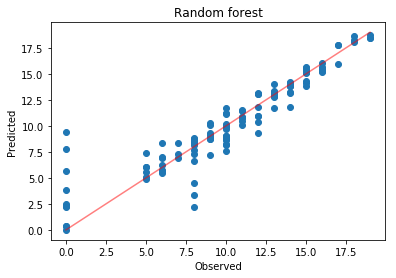

In [108]:
final_model = grid_search.best_estimator_
# predictions
final_predictions = final_model.predict(X_test)
rmscores(final_model)

# Computing R^2 performance metric for the regression model
from sklearn import metrics
print('R2_Score: ', metrics.r2_score(y_test,final_predictions))

plt.title('Random forest')
plt.scatter(y_test,final_predictions)
plt.plot([0,(np.max(y_test))],[0,(np.max(y_test))], 'r', alpha=0.5)
plt.xlabel('Observed')
plt.ylabel('Predicted')

# Comments:
1. From the Feature importance we can see 'G2' affects the most in his final grade 'G3'.
2. Out of Classification models Decision tree Classifier has best Validation score. So it would be preferred.
3. Out of Regression models Random Forest regressor has least RMSE error, so it is preferred.
4. After Performing prediction for important feature for tree based models(Random Forest & Decision Tree). Again Random forest has least error rate.